In [3]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import WhitespaceTokenizer

import plotly.graph_objects as go
import plotly.express as px

warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('updated_data_final_cleaned.csv', encoding="utf-8")
print(data.shape)
data.describe()

(14766, 3)


,length
count,14766.000000
mean,6342.309156
std,5338.601019
min,10.000000
25%,2656.250000
50%,4543.000000
75%,8269.750000
max,83724.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14766 entries, 0 to 14765
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instruction  14766 non-null  object
 1   Resume_test  14766 non-null  object
 2   length       14766 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 346.2+ KB


In [6]:
data[data.isna().any(axis=1) | data.isnull().any(axis=1)]

,instruction,Resume_test,length


In [7]:
data.nunique()

instruction       18
Resume_test    14300
length          8761
dtype: int64

In [8]:
valores_unicos = data.instruction.unique()
valores_unicos

array(['Automation Testing ', 'Blockchain ', 'Data Science ', 'Database ',
       'Designer ', 'DevOps Engineer ', 'DotNet Developer ',
       'ETL Developer ', 'Information Technology ', 'Java Developer ',
       'Network Security Engineer ', 'Project manager ',
       'Python Developer ', 'SAP Developer ', 'Security Analyst ',
       'Testing ', 'Web Designing ', 'Web Developer '], dtype=object)

In [9]:
#eliminar valores
valores_a_eliminar = ["Generate a Resume for a Chef Job",'Generate a Resume for a Hadoop Job','Generate a Resume for a Software Developer Job','Generate a Resume for a Finance Job','Generate a Resume for a HR Job','Generate a Resume for a Engineering Job','Generate a Resume for a Electrical Engineering Job','Generate a Resume for a Network Administrator Job','Generate a Resume for a Digital Media Job','Generate a Resume for a Systems Administrator Job','Generate a Resume for a Database Administrator Job','Generate a Resume for a Systems Administrator Job','Generate a Resume for a Consultant Job','Generate a Resume for a Banking Job','Generate a Resume for a Business Development Job','Generate a Resume for a Business Development Job','Generate a Resume for a Business Analyst Job','Generate a Resume for a Automobile Job',"Generate a Resume for a Aviation Job",'Generate a Resume for a BPO Job', "Generate a Resume for a Civil Engineer Job", "Generate a Resume for a Construction Job", "Generate a Resume for a Fitness Job", "Generate a Resume for a Health and fitness Job", "Generate a Resume for a Healthcare Job", "Generate a Resume for a Mechanical Engineer Job", "Generate a Resume for a Operations Manager Job", "Generate a Resume for a PMO Job", "Generate a Resume for a Public Relations Job", "Generate a Resume for a Sales Job", "Generate a Resume for a Teacher Job", "Generate a Resume for a Accountant Job", 'Generate a Resume for a Advocate Job', 'Generate a Resume for a Agriculture Job', 'Generate a Resume for a Apparel Job','Generate a Resume for a Arts Job']
df = data[~data['instruction'].isin(valores_a_eliminar)]

In [10]:
#imprimimos las etiquetas nuevas que quedaron
valores_unicos = df.instruction.unique()
print(valores_unicos)

['Automation Testing ' 'Blockchain ' 'Data Science ' 'Database '
 'Designer ' 'DevOps Engineer ' 'DotNet Developer ' 'ETL Developer '
 'Information Technology ' 'Java Developer ' 'Network Security Engineer '
 'Project manager ' 'Python Developer ' 'SAP Developer '
 'Security Analyst ' 'Testing ' 'Web Designing ' 'Web Developer ']


In [11]:
df.Resume_test[555]

'Freelance Web Designer Developer Freelance span lWebspan Designerspan lDeveloperspan Arlington TX Recent college graduate with 3 years of experience in web design web content management and digital marketing Im a Communication Technology major seeking to be a part of a challenging environment that utilizes teamwork efforts for researching learning and developing new hightech products in the Dallas Fort Worth area Authorized to work in the US for any employer Work Experience Freelance Web Designer Developer QBs Clean Cut Designs Arlington TX September 2016 to Present Design and develop websites using content management systems and hand coding Create complex graphics and professional designs for a variety of businesses and organizations Write and edit web code HTML CSS JavaScript Query Campaign Manager DexYP Grapevine TX June 2017 to August 2018 Developed and managed online marketing campaigns for small business owners which increased their online visibility by 50 Provided desktop suppo

In [12]:
df.nunique()

instruction       18
Resume_test    14300
length          8761
dtype: int64

In [13]:
df['length'] = df['Resume_test'].str.len()
df['length'].describe()

count    14766.000000
mean      6342.309156
std       5338.601019
min         10.000000
25%       2656.250000
50%       4543.000000
75%       8269.750000
max      83724.000000
Name: length, dtype: float64

Text(0.5, 1.0, 'Resume length distribution')

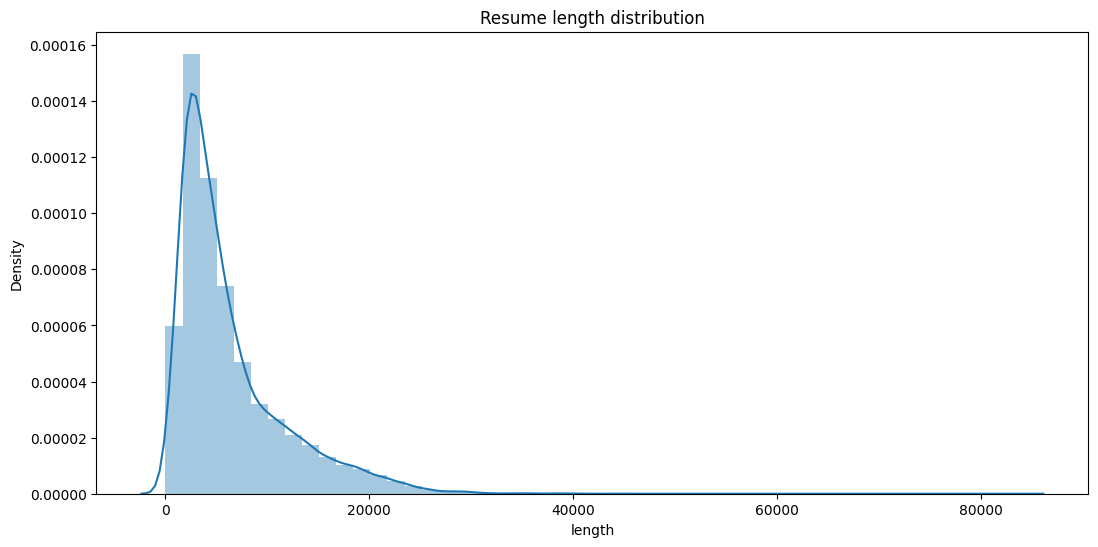

In [14]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['length']).set_title('Resume length distribution')

In [15]:
df['instruction'].value_counts()

instruction
Project manager               3527
Web Developer                 3466
Java Developer                2502
Python Developer              2359
Security Analyst              2259
Information Technology         120
Designer                       107
Testing                         70
DevOps Engineer                 55
Web Designing                   45
ETL Developer                   40
Blockchain                      40
Data Science                    40
Database                        33
DotNet Developer                28
Automation Testing              26
Network Security Engineer       25
SAP Developer                   24
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='instruction'>

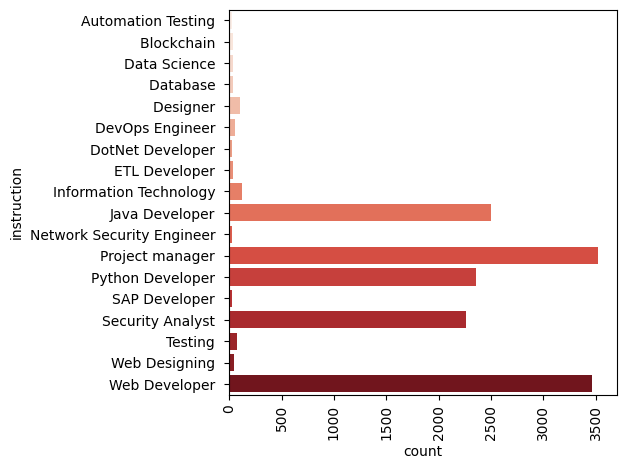

In [16]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(y="instruction", data=df, palette='Reds')

In [17]:
# Reemplaza 'instruccion' con el nombre de tu columna
# Reemplaza 'etiqueta' con la etiqueta que quieres contar
conteo_etiquetas = df['instruction'].value_counts().get('Generate a Resume for a DotNet Developer Job', 0)

print(f"La etiqueta aparece {conteo_etiquetas} veces")

La etiqueta aparece 0 veces


In [18]:
df['instruction'] = df['instruction'].str.replace('Generate a Resume for a ', '')
df['instruction'] = df['instruction'].str.split('Job').str[0]

df.reset_index(drop=True, inplace=True)

df['instruction']

0        Automation Testing 
1        Automation Testing 
2        Automation Testing 
3        Automation Testing 
4        Automation Testing 
                ...         
14761         Web Developer 
14762         Web Developer 
14763         Web Developer 
14764         Web Developer 
14765         Web Developer 
Name: instruction, Length: 14766, dtype: object

In [19]:
df.to_csv('updated_data_final_cleaned2.csv', index=False)


In [20]:
data_1 = pd.read_csv('updated_data_final_cleaned2.csv', encoding="utf-8")
data_2 = pd.read_csv('Curriculum Vitae.csv', encoding="utf-8")

data_1.head()


data_1.rename(columns={'Resume_test': 'Resume'}, inplace=True)

data_1.rename(columns={'instruction': 'Category'}, inplace=True)

print(data_1.info())

print(data_2.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14766 entries, 0 to 14765
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  14766 non-null  object
 1   Resume    14766 non-null  object
 2   length    14766 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 346.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024 entries, 0 to 11023
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  11024 non-null  object
 1   Resume    11024 non-null  object
dtypes: object(2)
memory usage: 172.4+ KB
None


In [21]:
# Verifica si hay valores nulos en el dataset
nulos_en_dataset = data_2.isnull().any().any()

# Mostrará True si hay al menos un valor nulo en el dataset, de lo contrario mostrará False
print(nulos_en_dataset)


# Si quieres obtener más detalles, como la cantidad de valores nulos por columna, puedes hacer lo siguiente:
nulos_por_columna = data_2.isnull().sum()
print(nulos_por_columna)

False
Category    0
Resume      0
dtype: int64


In [22]:
print(data_1.shape)
print(data_1.columns)
print(data_1.Category.value_counts())


(14766, 3)
Index(['Category', 'Resume', 'length'], dtype='object')
Category
Project manager               3527
Web Developer                 3466
Java Developer                2502
Python Developer              2359
Security Analyst              2259
Information Technology         120
Designer                       107
Testing                         70
DevOps Engineer                 55
Web Designing                   45
ETL Developer                   40
Blockchain                      40
Data Science                    40
Database                        33
DotNet Developer                28
Automation Testing              26
Network Security Engineer       25
SAP Developer                   24
Name: count, dtype: int64


In [23]:

print(data_2.shape)
print(data_2.columns)
print(data_2.Category.value_counts())


(11024, 2)
Index(['Category', 'Resume'], dtype='object')
Category
Testing                      1120
Java Developer                924
DevOps Engineer               660
Python Developer              559
Blockchain                    540
Hadoop                        504
ETL Developer                 480
Web Designing                 450
HR                            440
Operations Manager            440
Data Science                  400
Sales                         400
Mechanical Engineer           400
Database                      396
PMO                           360
Arts                          360
DotNet Developer              336
Electrical Engineering        330
Business Analyst              308
Health and fitness            303
Network Security Engineer     300
Automation Testing            286
SAP Developer                 264
Civil Engineer                264
Advocate                      200
Name: count, dtype: int64


In [24]:
rows_to_add = data_2.shape[0] - data_1.shape[0]

additional_rows = pd.DataFrame(index=range(rows_to_add), columns=data_2.columns)

df2_aligned = pd.concat([additional_rows, data_2], ignore_index=True)

result = pd.concat([data_1, df2_aligned], axis=0)

result.drop(result.columns[result.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)



In [25]:
# Verifica si hay valores nulos en el dataset
nulos_en_dataset = result.isnull().any().any()

# Mostrará True si hay al menos un valor nulo en el dataset, de lo contrario mostrará False
print(nulos_en_dataset)


# Si quieres obtener más detalles, como la cantidad de valores nulos por columna, puedes hacer lo siguiente:
nulos_por_columna = result.isnull().sum()
print(nulos_por_columna)

True
Category        0
Resume          0
length      11024
dtype: int64


In [26]:
print(result.shape)
print(result.columns)
print(result.Category.value_counts())


(25790, 3)
Index(['Category', 'Resume', 'length'], dtype='object')
Category
Project manager               3527
Web Developer                 3466
Java Developer                2502
Python Developer              2359
Security Analyst              2259
Testing                       1120
Java Developer                 924
DevOps Engineer                660
Python Developer               559
Blockchain                     540
Hadoop                         504
ETL Developer                  480
Web Designing                  450
Operations Manager             440
HR                             440
Sales                          400
Mechanical Engineer            400
Data Science                   400
Database                       396
PMO                            360
Arts                           360
DotNet Developer               336
Electrical Engineering         330
Business Analyst               308
Health and fitness             303
Network Security Engineer      300
Automation Tes

In [27]:
#esto ya no sirve dada la suma de los dos datasets hecha anteriormente
result = result.dropna()
result.isnull()



,Category,Resume,length
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
14761,False,False,False
14762,False,False,False
14763,False,False,False
14764,False,False,False


In [28]:
print(result.shape)
print(result.columns)
print(result.Category.value_counts())


(14766, 3)
Index(['Category', 'Resume', 'length'], dtype='object')
Category
Project manager               3527
Web Developer                 3466
Java Developer                2502
Python Developer              2359
Security Analyst              2259
Information Technology         120
Designer                       107
Testing                         70
DevOps Engineer                 55
Web Designing                   45
ETL Developer                   40
Blockchain                      40
Data Science                    40
Database                        33
DotNet Developer                28
Automation Testing              26
Network Security Engineer       25
SAP Developer                   24
Name: count, dtype: int64


In [29]:
result['Category'] = result['Category'].str.strip()

In [30]:


#eliminar valores
valores_a_eliminar = ['HR','Advocate','Arts','Sales','Mechanical Engineer', 'Health and fitness','Civil Engineer', 'Business Analyst', 'Electrical Engineering', 'Operations Manager', 'PMO',"SAP Developer", "Automation Testing"]
result = result[~result['Category'].isin(valores_a_eliminar)]

result["Category"].unique()

array(['Blockchain', 'Data Science', 'Database', 'Designer',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Information Technology', 'Java Developer',
       'Network Security Engineer', 'Project manager', 'Python Developer',
       'Security Analyst', 'Testing', 'Web Designing', 'Web Developer'],
      dtype=object)

In [31]:
#eliminar valores
valores_a_eliminar = ['SAP Developer ', 'Designer', 'Automation Testing','Project manager', 'SAP Developer', 'Security Analyst','ETL Developer','Hadoop','Web Designing']
df = result[~result['Category'].isin(valores_a_eliminar)]

df["Category"].unique()



array(['Blockchain', 'Data Science', 'Database', 'DevOps Engineer',
       'DotNet Developer', 'Information Technology', 'Java Developer',
       'Network Security Engineer', 'Python Developer', 'Testing',
       'Web Developer'], dtype=object)

In [32]:
print(df.shape)
print(df.columns)
print(df.Category.value_counts())

(8738, 3)
Index(['Category', 'Resume', 'length'], dtype='object')
Category
Web Developer                3466
Java Developer               2502
Python Developer             2359
Information Technology        120
Testing                        70
DevOps Engineer                55
Blockchain                     40
Data Science                   40
Database                       33
DotNet Developer               28
Network Security Engineer      25
Name: count, dtype: int64


In [33]:
#reducir las etiquetas a 1200
def sample_n(df, n=1200):
    return df.sample(min(len(df), n))

df = df.groupby('Category').apply(sample_n).reset_index(drop=True)

In [34]:
print(df.shape)
print(df.columns)
print(df.Category.value_counts())

(4011, 3)
Index(['Category', 'Resume', 'length'], dtype='object')
Category
Java Developer               1200
Python Developer             1200
Web Developer                1200
Information Technology        120
Testing                        70
DevOps Engineer                55
Blockchain                     40
Data Science                   40
Database                       33
DotNet Developer               28
Network Security Engineer      25
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Category'>

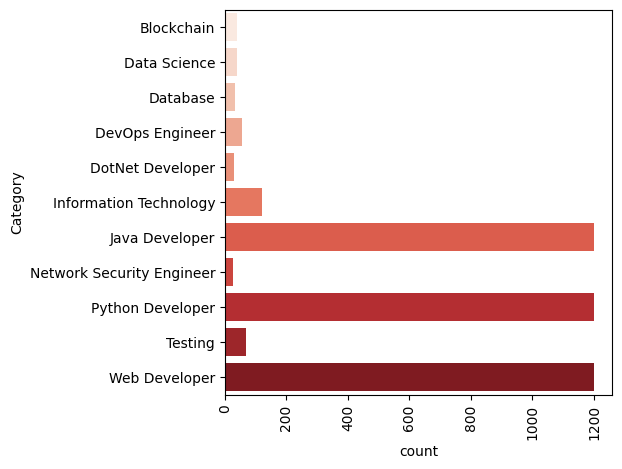

In [35]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df, palette='Reds')

In [36]:
df.to_csv('updated_data_final_cleaned3.csv', index=False)